In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np

In [2]:
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
x=df.drop("target",axis=1)
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=0.2)

In [4]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3


In [5]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3


In [6]:
dt_cls=DecisionTreeClassifier(criterion="gini")
dt_cls.fit(x_train,y_train)

DecisionTreeClassifier()

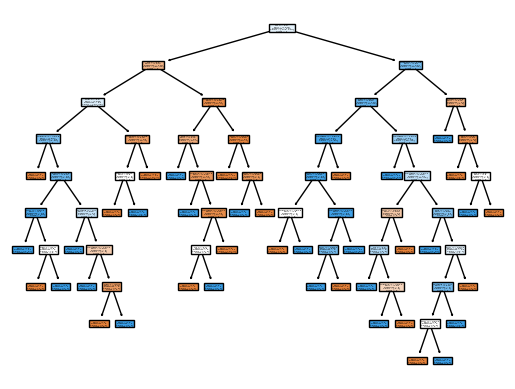

In [7]:
# plt.figure(figsize = (100,90))
tree=plot_tree(dt_cls,feature_names=x.columns,class_names=["0","1"],filled=True)
# plt.savefig('DT_clf.png')


In [8]:
# Training Data Evaluation
y_pred_train = dt_cls.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)
print('*'*50)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print('*'*50)
cls_report = classification_report(y_train, y_pred_train)
print('Classification report :\n',cls_report)


Confusion Matrix:
 [[113   0]
 [  0 129]]
**************************************************
Accuracy : 1.0
**************************************************
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       129

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [9]:
# Training Data Evaluation
y_pred = dt_cls.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cnf_matrix)
print('*'*50)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print('*'*50)
clf_report = classification_report(y_test, y_pred)
print('Classification report :\n',clf_report)


Confusion Matrix:
 [[20  5]
 [ 7 29]]
**************************************************
Accuracy : 0.8032786885245902
**************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.85      0.81      0.83        36

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [10]:
dt_cls.feature_importances_

array([0.07549728, 0.0413332 , 0.24548518, 0.08964647, 0.12319193,
       0.0066406 , 0.02651628, 0.0616431 , 0.01618106, 0.0879399 ,
       0.02241202, 0.13599729, 0.06751571])

<Axes: >

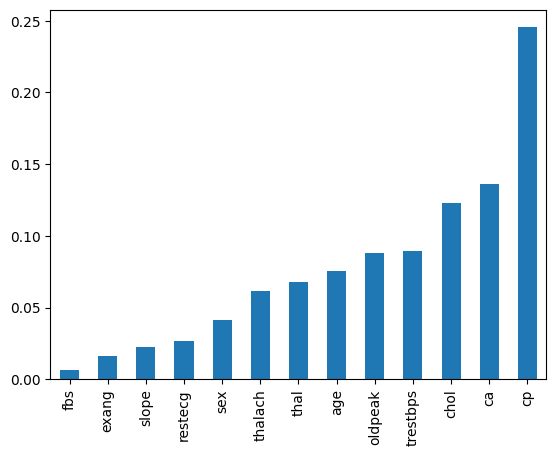

In [11]:
s1 = pd.Series(dt_cls.feature_importances_, index= x.columns)
s1.sort_values().plot(kind = 'bar')

In [12]:
dt_model = DecisionTreeClassifier(random_state=1)

hyp_grid = {
            "criterion" :['gini','entropy'],
            "max_depth" : np.arange(5,10),
            "min_samples_split" : range(10,15),
            "min_samples_leaf" : range(3,8)}

gscv_dt_model = GridSearchCV(dt_model,param_grid = hyp_grid, cv = 3,n_jobs  = -1)
gscv_dt_model.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'min_samples_leaf': range(3, 8),
                         'min_samples_split': range(10, 15)})

In [13]:
dt_clf = gscv_dt_model.best_estimator_
dt_clf.fit(x_train, y_train)
print('Train Accuracy :',dt_clf.score(x_train, y_train))
print("Test Accuracy  :",dt_clf.score(x_test, y_test))
plt.figure(figsize = (100,90))
tree = plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1'], filled=True)
plt.savefig('DT_clf_test.png')

Train Accuracy : 0.8760330578512396
Test Accuracy  : 0.8360655737704918
